<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject2/2Miniproject_Ton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PCA

## 1.1 Carga de libreías y base de datos

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/data_course/US_Accidents_Dec19.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


## 1.2 Preparación de los datos

In [0]:
df_num = df.select_dtypes(include='number') # Seleccionamos sólo los datos numéricos

df_petit=df_num[0:1000] # Reducimos el volumen de datos a 1000 filas

df_mean = df_petit.fillna(df_petit.mean()) # Eliminamos los valores NaN por la media se su columna

df_nan = df_mean.drop(columns=['End_Lat', 'End_Lng']) # Eliminamos estas 2 columnas porqué sólo tenian valores NaN y no se puede realizar la media


In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(df_nan)

In [6]:
df_nan.columns

Index(['TMC', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Number',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'],
      dtype='object')

In [0]:
X = df_nan[['TMC', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Number',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']] # Características
y = df_nan['Severity'] # Severity equivaldria a la "calidad" del accidente

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X) # Escalamos los datos

In [9]:
XS.shape

(1000, 12)

In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=12).fit(XS)

In [11]:
100*pca.explained_variance_ratio_.cumsum()

array([ 28.52967932,  41.53076008,  51.33586747,  60.30026414,
        68.91567959,  76.92159061,  84.67881708,  91.11176452,
        94.86643213,  98.08492211,  99.25670726, 100.        ])

Necesitamos 8 de las 12 dimensiones para llegar a explicar el 90% de los datos, por lo tanto, no podemos reducir las dimensiones de forma eficaz en esta base de datos.

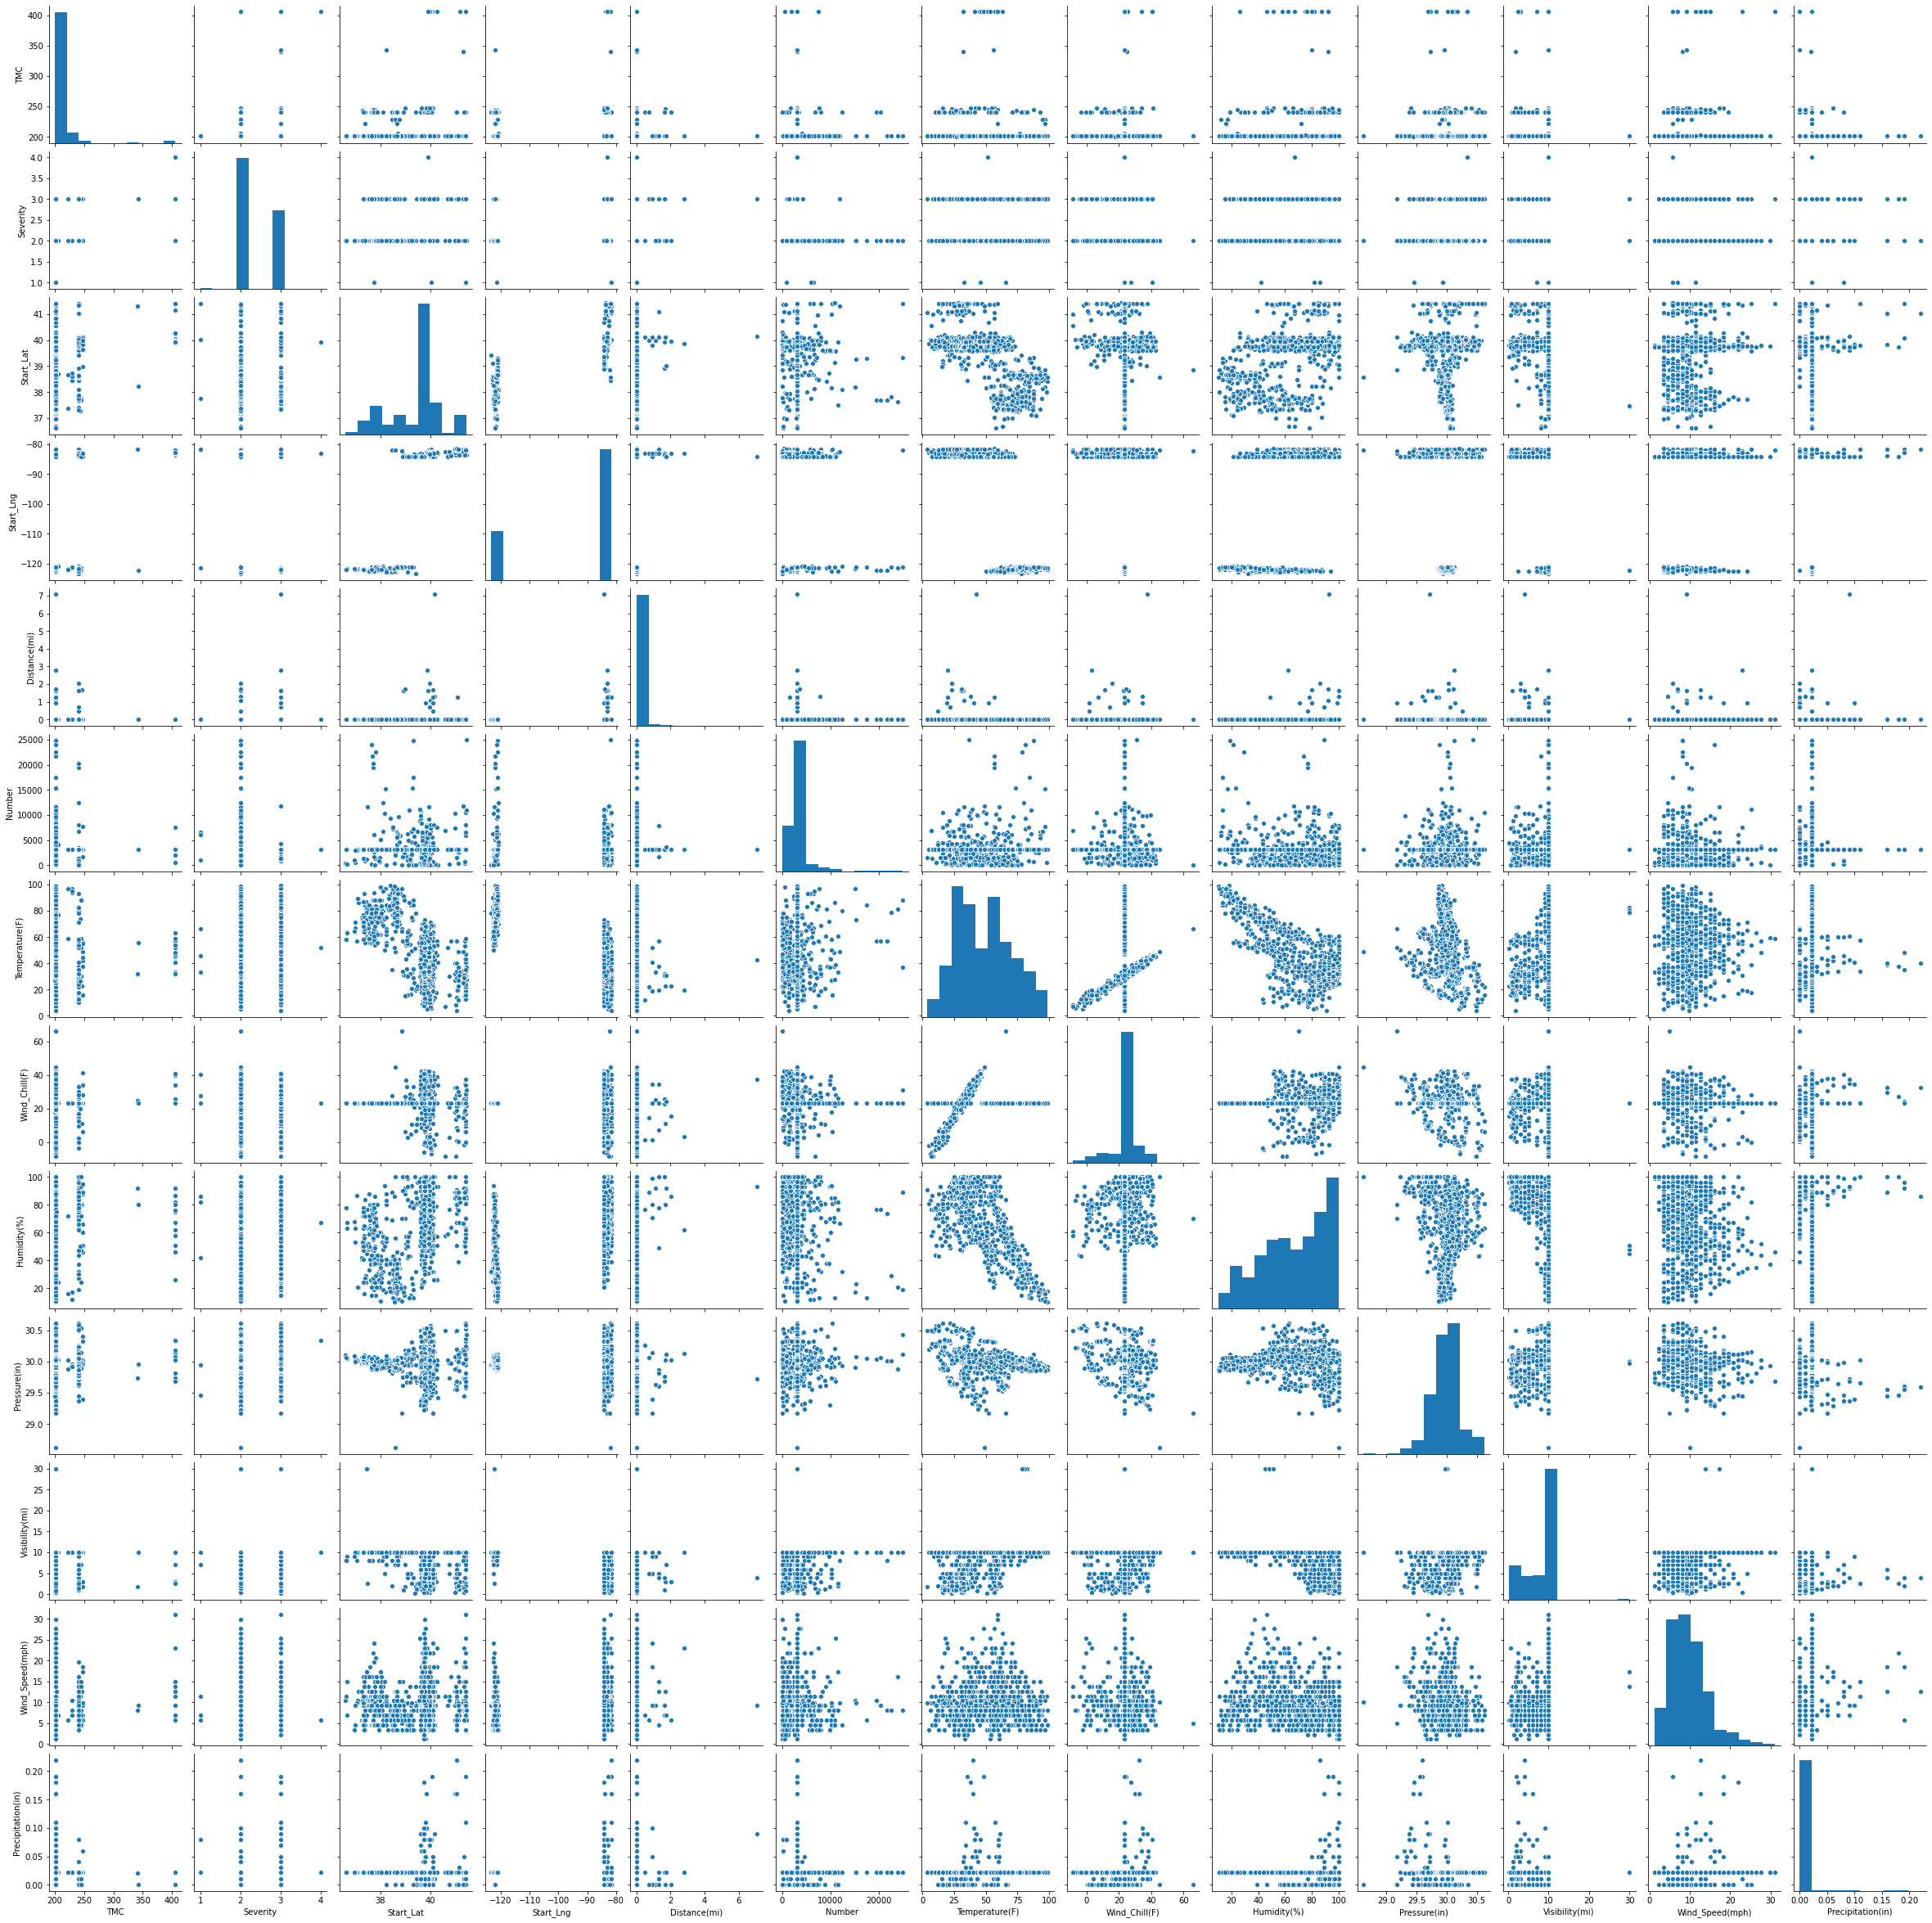

In [0]:
sns.pairplot(df_nan)
plt.show()

# 2. RFE

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

X = df_nan
y = df_nan['Severity']

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Kept features: [False  True False False False False False False False False False False
 False]
Raking of the features: [ 6  1  8  9 12 13  3  2  4 11  7  5 10]


En este código falta eliminar la severidad del accidente en la bbdd.

In [0]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

df_nans = df_nan.drop('Severity',1) # Eliminamos severidad de los datos
X = df_nans # Datos sin la clave severidad
y = df_nan['Severity'] # Valor clave es Severidad

# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

(No se presenta el resultado porqué se queda calculando indefinidamente)

In [0]:
sns.pairplot(df_nan,hue='Severity')
plt.show()

(No se presenta el resultado porqué se queda calculando indefinidamente)